In [1]:
from google.colab import files
uploaded = files.upload()

Saving superstore_final_dataset (1).csv to superstore_final_dataset (1).csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

In [6]:
df = pd.read_csv("superstore_final_dataset (1).csv", encoding='latin1')
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [8]:
# Basic structure
df.info()
df.describe()

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop irrelevant columns (if any)
df = df.drop(['Postal_Code'], axis=1)

# Convert 'Order Date' and 'Ship Date' to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], errors='coerce')

# Remove duplicates
df.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [10]:
print("Category Distribution:\n", df['Category'].value_counts())
print("Sub-Category Distribution:\n", df['Sub_Category'].value_counts())

Category Distribution:
 Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64
Sub-Category Distribution:
 Sub_Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64


In [12]:
print("Total Sales:", df['Sales'].sum())
# print("Total Profit:", df['Profit'].sum())
# print("Total Quantity Sold:", df['Quantity'].sum())

Total Sales: 2261536.7827000003


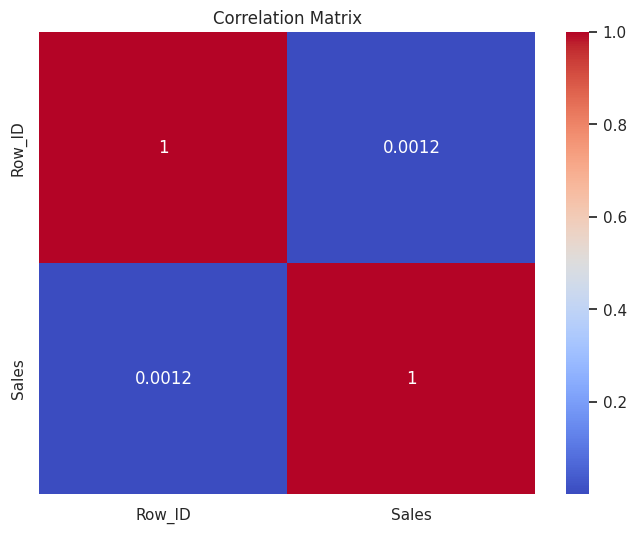

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

/tmp/ipython-input-14-3731938357.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None, palette='Set2')
/tmp/ipython-input-14-3731938357.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None, palette='Set2')


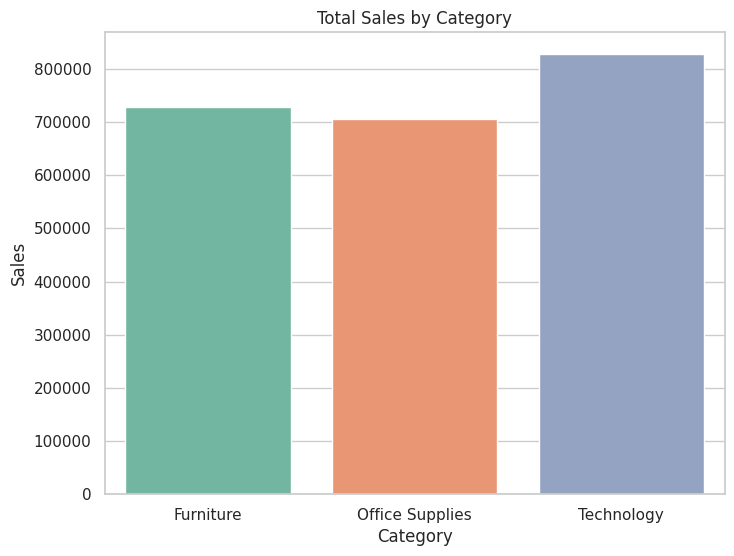

In [14]:
plt.figure(figsize=(8,6))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None, palette='Set2')
plt.title("Total Sales by Category")
plt.show()

/tmp/ipython-input-16-144973523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sub_Category', y='Sales', data=df, estimator=sum, errorbar=None, palette='Set3')


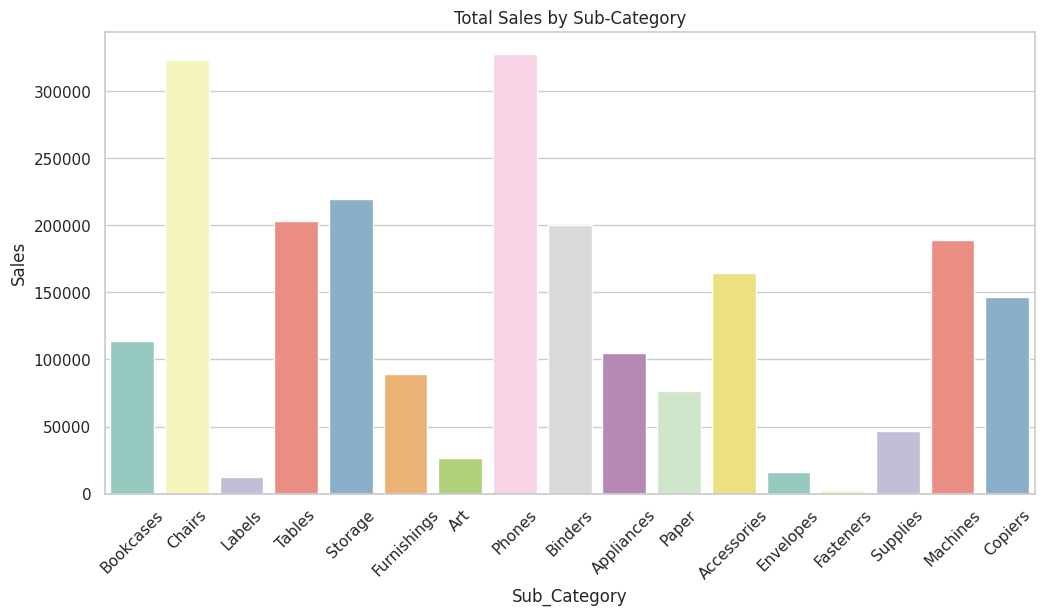

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(x='Sub_Category', y='Sales', data=df, estimator=sum, errorbar=None, palette='Set3')
plt.title("Total Sales by Sub-Category")
plt.xticks(rotation=45)
plt.show()

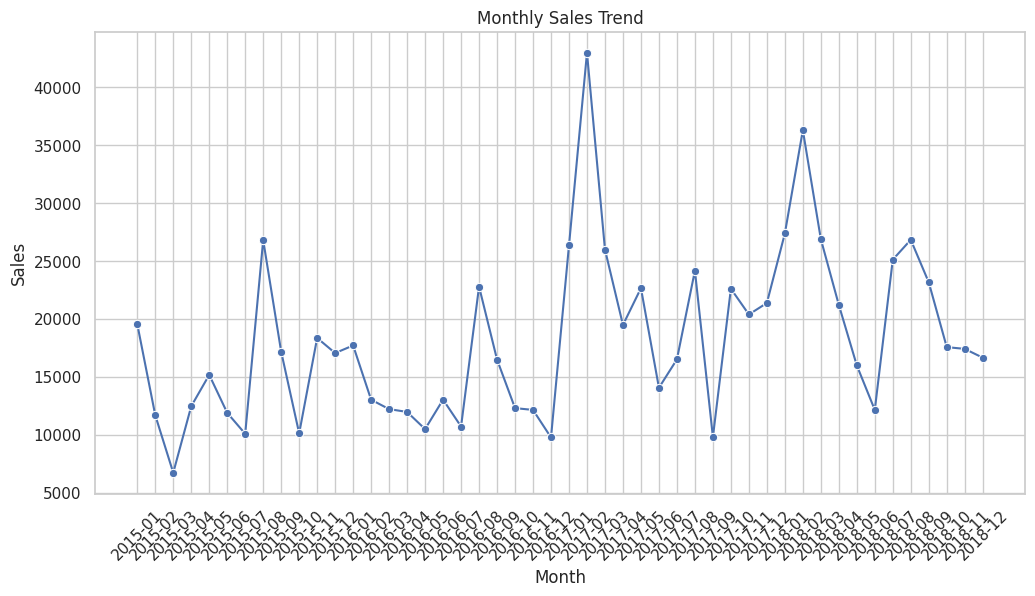

In [19]:
df['Month'] = df['Order_Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Sales', data=monthly_sales, marker='o')
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()

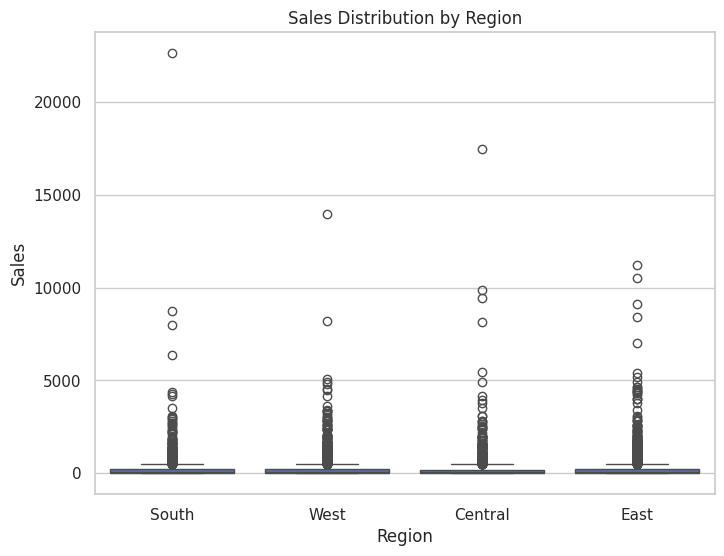

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Region', y='Sales', data=df)
plt.title("Sales Distribution by Region")
plt.show()